# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings("ignore")

# Reading the data set

In [2]:
df = pd.read_csv("internet_service_churn.csv")

In [3]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


# Filling the columns with missing values

In [4]:
df['reamining_contract'] = df['reamining_contract'].fillna(df['reamining_contract'].median())

In [5]:
sum(df["download_avg"].isna())

381

In [6]:
df["download_avg"] = df["download_avg"].fillna(df["download_avg"].median())

In [7]:
sum(df["upload_avg"].isna())

381

In [8]:
df["upload_avg"] = df["upload_avg"].fillna(df["upload_avg"].mean())

# Checking the correlation between the features 

In [9]:
df.corr()['churn'].sort_values()

reamining_contract            -0.566886
id                            -0.451142
is_tv_subscriber              -0.327582
is_movie_package_subscriber   -0.307167
download_avg                  -0.295554
upload_avg                    -0.162153
subscription_age              -0.122441
bill_avg                      -0.021058
service_failure_count          0.021575
download_over_limit            0.158318
churn                          1.000000
Name: churn, dtype: float64

<AxesSubplot: >

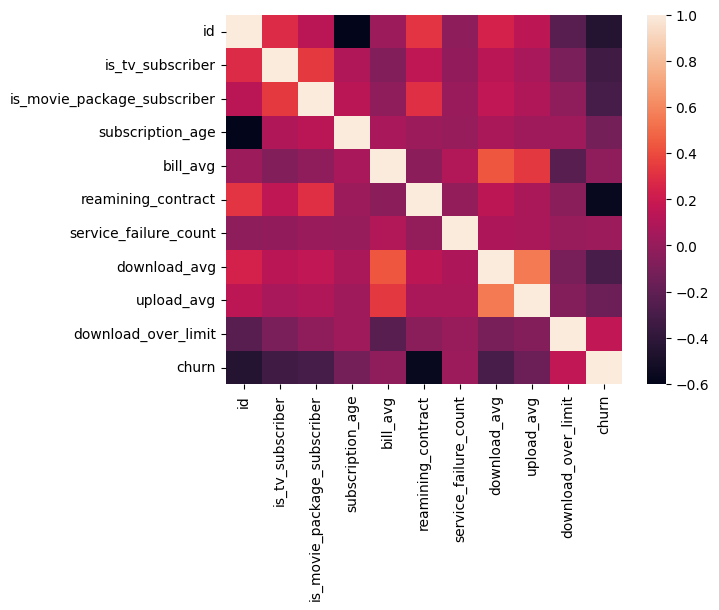

In [10]:
sns.heatmap(df.corr())

<AxesSubplot: >

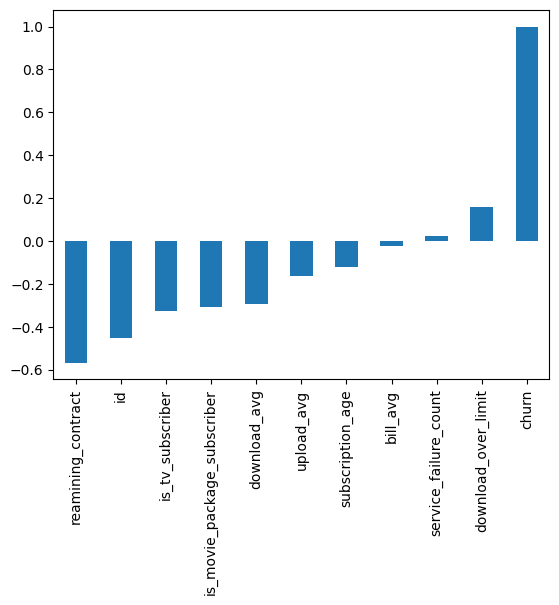

In [11]:
df.corr()['churn'].sort_values().plot(kind='bar')

<AxesSubplot: >

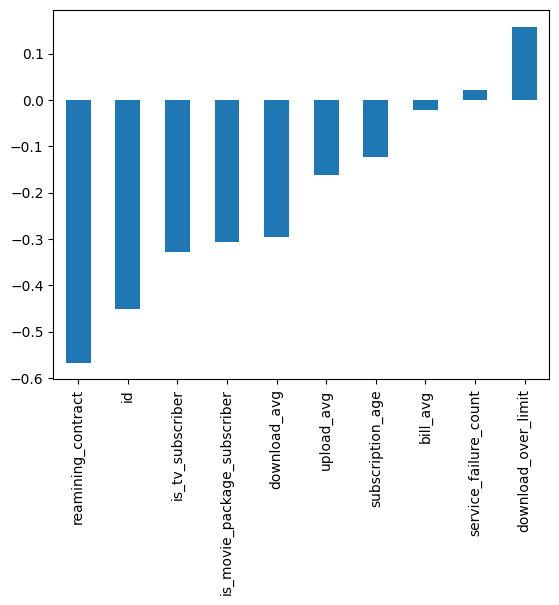

In [12]:
df.corr()['churn'][:-1].sort_values().plot(kind='bar')

# Splitting the data set into target and attributes

In [13]:
y = df["churn"]

In [14]:
X = df.drop("churn", axis=1)

# Performing a train test split 
### 90% data for train
### 10% data for test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=146)

In [16]:
X_train

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
27526,645438,1,0,5.18,25,0.02,0,71.0,4.8,0
58222,1363820,1,0,1.03,19,0.57,0,7.9,1.5,0
44038,1031547,1,0,2.86,12,0.98,0,60.1,4.1,0
35481,833480,1,0,1.81,25,0.00,0,68.6,3.7,0
68766,1608248,1,0,0.30,27,0.57,0,2.9,0.3,0
...,...,...,...,...,...,...,...,...,...,...
48480,1136758,1,1,2.27,16,1.64,0,45.0,3.0,0
68380,1599489,1,0,0.27,0,1.95,1,54.8,3.6,0
45009,1054469,1,0,2.66,19,0.57,0,42.0,10.1,0
19298,451415,1,0,2.03,23,0.57,0,17.3,1.5,0


# Scaling the variable 

In [17]:
scaler = StandardScaler()
model_scalar = scaler.fit(X_train)
X_train = model_scalar.transform(X_train)

In [18]:
X_test = model_scalar.transform(X_test)

# Creating the model and training

In [19]:
model = GaussianNB()

In [20]:
model.fit(X_train, y_train)

GaussianNB()

# Evaluating the performance on the test data 

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
y_pred = y_pred > 0.5 # Setting a threshold as 0.5 to discretized the outputs

In [24]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       False       0.91      0.73      0.81      4109
        True       0.72      0.91      0.80      3119

    accuracy                           0.81      7228
   macro avg       0.81      0.82      0.81      7228
weighted avg       0.83      0.81      0.81      7228



In [25]:
print(confusion_matrix(y_pred, y_test))

[[2981 1128]
 [ 280 2839]]


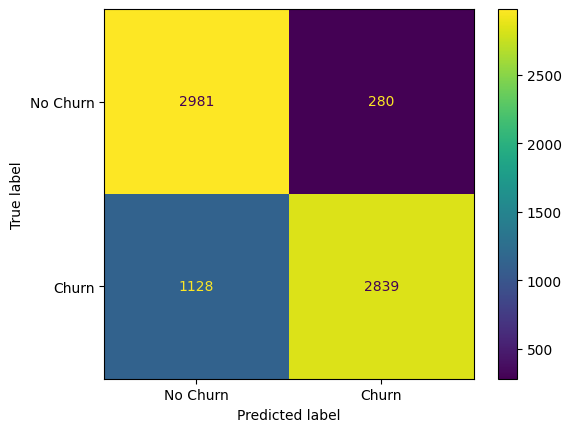

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["No Churn", "Churn"])
disp.plot()
plt.show()

# Custom input

In [28]:
a=int(input("id "))
b=int(input("is tv subscriber 1-yes 0-no "))
c=int(input("is move package subscriber 1-yes 0-no "))
d=int(input("Age of subscriber "))
e=int(input("Bill average "))
f=int(input("Remaining contract "))
g=int(input("Service failure count "))
h=int(input("Avd download speed "))
i=int(input("Average upload speed "))
j=int(input("Download over limit "))

id 23
is tv subscriber 1-yes 0-no 1
is move package subscriber 1-yes 0-no 0
Age of subscriber 21
Bill average 25
Remaining contract 2
Service failure count 1
Avd download speed 45
Average upload speed 30
Download over limit 30


In [29]:
a = np.array([a, b, c, d, e, f, g, h, i, j]).reshape(1, -1)

In [30]:
model.predict(a)

array([1], dtype=int64)